In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir=['./train/shirt/','./test/shirt/','./train/not_a_shirt/','./test/not_a_shirt/']
##counting files in directory
channels=3
image_size=28

def make_array(dir):
    count=0;
    for folder in dir:
        files=os.listdir(folder)
        for file in files:
            count=count+1;
    
    dataset=np.ndarray(shape=(count,image_size,image_size,channels), dtype=np.float32)
    labels=np.ndarray(shape=(count), dtype=np.int32)
    return dataset,labels

In [3]:
dataset,labels=make_array(dir)
num_cloth=0
pixel_depth=255.0

for i,folder in enumerate(dir):
    files=os.listdir(folder)
    if (i<2):
        category=0
    else:
        category=1
    for file in files:
        c=folder+file
        img=cv2.imread(c)
        img=cv2.resize(img,(28,28))
        img= img.astype(np.float32)
        img= (np.array(img).astype(float) - 
                    pixel_depth / 2) / pixel_depth
        dataset[num_cloth, :, :, :]=img
        labels[num_cloth]=category
        num_cloth=num_cloth+1
dataset=dataset[0:num_cloth, :, :, :]
labels=labels[0:num_cloth]

In [5]:
dataset=np.array(dataset)
labels=np.array(labels)
test=dataset[61,:,:,:]
test_title=labels[61]

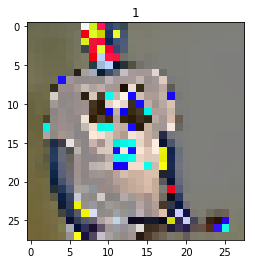

In [6]:
plt.imshow(test)
plt.title(test_title)

In [7]:
dataset.shape

(62, 28, 28, 3)

In [8]:
#Randomise data
def randomise_data(dataset,labels):
    permutation=np.random.permutation(labels.shape[0])
    shuffled_dataset=dataset[permutation, :, :, :]
    shuffled_labels=labels[permutation]
    return shuffled_dataset,shuffled_labels

dataset,labels=randomise_data(dataset,labels)

In [9]:
def split_data(dataset,labels):
    setA=dataset[0:45, :, :, :]
    labelA=labels[0:45]
    
    setB=dataset[45:55, :, :, :]
    labelB=labels[45:55]
    
    setC=dataset[55:63, :, :, :]
    labelC=labels[55:63]
    
    return setA,setB,setC,labelA,labelB,labelC

train_dataset,valid_dataset,test_dataset,train_labels,valid_labels,test_labels=split_data(dataset,labels)

In [10]:
from six.moves import cPickle as pickle
#dump it in a common .pickle file to be reused many times
data_root='.'
pickle_file = os.path.join(data_root, 'IMAGE_data.pickle')

with open(pickle_file, 'wb') as f:
    save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()